# TRỰC QUAN HÓA DỮ LIỆU

### Sau khi tiền xử lí dữ liệu, bây giờ ta trực quan hóa dữ liệu để có thể cái nhìn tổng quan hơn về dữ liệu.

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.simplefilter('ignore')

Đọc file dữ liệu đã qua tiền xử lý.

In [44]:
df = pd.read_csv('../data/cars_info_preprocessed.csv')
df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


# Đưa ra các câu hỏi cần trả lời
***Câu 1:*** *Xe động cơ chạy bằng loại nhiên liệu nào được bán lại nhiều hơn?*

***Câu 2:*** *Những hãng xe nào sản xuất nhiều xe nhất trong những năm gần đây (2020 - nay) và những hãng xe nào sản xuất ít xe nhất hoặc thậm chí ngừng sản xuất xe?*

***Câu 3:*** *Kiểu dáng xe nào mà người dùng ưa thích nhất của từng hãng xe (chỉ xét các hãng xe có số lượng xe > 100)*

***Câu 4:*** *Tồng doanh thu của từng hãng xe qua từng năm là bao nhiêu?*

***Câu 5:*** *Giá xe trung bình của các xe trong các khoảng phân phối của xe ?*

***Câu 6:*** *Với góc nhìn của 1 người chuyên bán xe sang, tôi muốn biết những chiếc xe sang được sản xuất trong 3 năm gần đây thuộc những brand nào và phân bố số chỗ ngồi của nó như thế nào? (với xe sang là những xe có định giá trên 100k $*

# Câu 1: Xe động cơ chạy bằng loại nhiên liệu nào được bán lại nhiều hơn?

Với tình hình năng lượng thế giới đang căng thẳng như hiện nay, có lẽ việc quan tâm đến xe chạy bằng xăng hay dầu cũng khá quan trọng. Vì vậy em chọn khảo sát về vấn đề xe chạy máy xăng hay máy dầu (em không khảo sát các loại khác vì nó chiếm một tỉ trọng khá ít trong data này và cũng chưa quá phổ biến như xe xăng và dầu). Nhưng em sẽ khảo sát những xe đã qua sử dụng thôi, để xem xe máy xăng hay máy dầu bị bán lại nhiều hơn (một phần vì em nghĩ nếu không có việc gì thì người dùng sẽ không mang xe đi bán lại, còn một phần là vì trong dữ liệu này phần rất lớn là xe bán lại, hay nói gần gũi hơn là xe cũ). Để mọi người có thể tham khảo khi sau này chọn mua xe nên chọn máy xăng hay máy dầu.

Đoạn code dưới đây lọc bớt 1 số dòng ít cần thiết với câu hỏi và chỉ lấy những xe ở tình trạng cũ.

In [48]:
temp = df.copy()
for index, row in temp.iterrows():
    if row['Status'] == " Demo" or row['Status'] == " New In Stock":
        temp.drop(index,inplace=True)

for index, row in temp.iterrows():
    if (row['Fuel'] == "Premium Unleaded/Electric" or row['Fuel'] == "Unleaded Petrol/Electric" 
    or row['Fuel']=='Liquid Petroleum Gas' or row['Fuel']=='Diesel/Electric'):
        temp.drop(index,inplace=True)


# 'Unleaded Petrol' 'Diesel' 'Premium Unleaded Petrol'
# 'Premium Unleaded/Electric' 'Unleaded Petrol/Electric'
# 'Liquid Petroleum Gas' 'Diesel/Electric'


Đoạn code dưới nhằm gộp "Unleaded Petrol" và "Premium Unleaded Petrol" thành 1 tên chung là "Petrol".

In [49]:

temp['Fuel'] = temp['Fuel'].replace('Unleaded Petrol','Petrol')
temp['Fuel'] = temp['Fuel'].replace('Premium Unleaded Petrol','Petrol')


Vẽ biểu đồ.

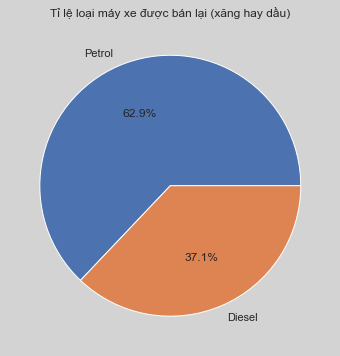

In [50]:
infor = np.array(temp['Fuel'].value_counts().index)
count = np.array(temp['Fuel'].value_counts())

# plt.figure(figsize = (10,6))
fig, ax = plt.subplots(figsize = (10,6))
# plt.bar(infor,count)
label=["Petrol","Diesel"]
plt.pie(count,labels=label,autopct='%1.1f%%')
fig.set_facecolor('lightgrey')
# plt.xlabel('Loại nhiên liệu')
# plt.ylabel('Số lượng')  
plt.title('Tỉ lệ loại máy xe được bán lại (xăng hay dầu)')
plt.show()


Ở đây có 3 loại nguyên liệu có số lượng lớn nhất, đó là Unleaded Petrol,  Diesel và Premium Unleaded Petrol (có thể hiểu nôm na là xăng, dầu Diesel và xăng cao cấp). Nhưng vì xăng hay xăng cao cấp thì cũng là xăng, nên em gộp 2 này lại và gọi chung là "Petrol".

Ta thấy được xe chạy bằng xăng bị bán lại nhiều hơn xe dầu (gần gấp đôi).

Vậy tại sao xe xăng lại bị bán lại nhiều như vậy, có thể do một số nhược điểm sau trong quá trình sử dụng:
- Tốn nhiên liệu hơn xe máy dầu.
- Dễ bốc cháy ở nhiệt độ cao gây nguy hiểm.

Ở bối cảnh mà tình hình năng lượng thế giới đang căng thẳng, việc những chiếc xe xăng tốn nhiều nguyên liệu hơn dễ bị bán lại hơn có vẻ cũng hợp lý. 

Đương nhiên đây chỉ là một trong những góc nhìn hạn hẹp của em về vấn đề này. Có thể đơn giản vì xe xăng được mua nhiều hơn nên số lượng bán lại cũng nhiều hơn. Tuy nhiên, trong phạm vi của tập dữ liệu xe đang được bán lại này nên em tiếp cận theo góc nhìn như trên.

# Câu 2: Những hãng xe nào sản xuất nhiều xe nhất trong những năm gần đây (2020 - nay) và những hãng xe nào sản xuất ít xe nhất hoặc thậm chí ngừng sản xuất xe?

Ý nghĩa: Với góc nhìn của một người mua xe hoặc bán xe, ta có thể biết được hãng xe nào hoạt động mạnh, những hãng xe nào ít hoạt động hoặc thậm chí bị ngừng hoạt động, từ đó giúp tham khảo để mua xe hoặc phân phối xe. (Ví dụ như em nghĩ chẳng có ai muốn mua một chiếc xe mà hãng xe sản xuất ra nó đã ngừng hoạt động).

Đoạn code dưới nhằm tạo một DataFrame mới từ data cũ sau khi đã xóa những chiếc xe được sản xuất trước năm 2020.

In [51]:
df_temp=df.copy()

for index, row in df_temp.iterrows():
    if row['Year'] < 2020:
        df_temp.drop(index,inplace=True)


Đoạn code dưới dùng để vẽ biểu đồ minh họa.

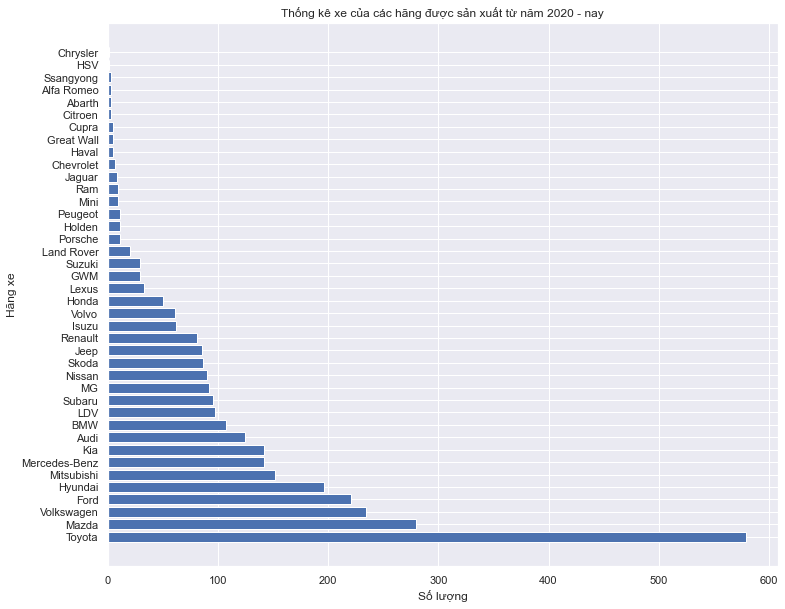

In [53]:

infor = np.array(df_temp['Brand'].value_counts().index)
count = np.array(df_temp['Brand'].value_counts())

plt.figure(figsize = (12,10))

plt.barh(infor,count)
plt.xlabel('Số lượng')
plt.ylabel('Hãng xe')  
plt.title('Thống kê xe của các hãng được sản xuất từ năm 2020 - nay')

plt.show()

Như biểu đồ trên thể hiện, ta thấy một số hãng xe đã dường như không còn sản xuất xe mới nữa (trong phạm vi tập dữ liệu này), ví dụ như Chrysler và HSV, hoặc một số hãng khác có rất ít xe được sản xuất trong 2 năm gần đây. Mặt khác ta cũng có thể thấy những hãng xe có rất nhiều xe mới, dẫn đầu không có gì bất ngờ khi là Toyota. Kế tiếp là Mazda, Volkswagen, Ford, ...

# Câu 3: Kiểu dáng xe nào mà người dùng ưa thích nhất của từng hãng xe (chỉ xét các hãng xe có số lượng xe > 100)

In [3]:
# Đếm tổng xe của từng hãng
car_counts = df['Brand'].value_counts().rename_axis('Brand').reset_index(name='counts')

# Lấy số lượng xe > 100
car_counts = car_counts[car_counts['counts'] > 100]

Tạo dataframe mới chỉ có các hãng xe có số lượng > 100

In [4]:
df_copy = df.copy()
cars = car_counts['Brand'].values
cars_df = df_copy[df_copy['Brand'].isin(cars)].reset_index(drop=True)

Sau khi có được dataframe mới bao gồm các xe ta cần, tiếp tục tìm kiểu dáng xe ưa thích

In [5]:
# Đếm số lượng tất cả kiểu dáng xe của từng hãng
counting_car = cars_df.groupby(["Brand", "Type"]
                              ).agg({'Type':'count'}
                                   ).rename(columns={'Type':'Count'}
                                           ).reset_index()

In [7]:
# Sắp xếp số lượng xe theo giá trị giảm dần theo từng hãng xe
counting_car = counting_car.sort_values(['Brand','Count'], ascending=False)

# Lấy giá trị cao nhất của từng hãng xe
counting_car_max = counting_car.groupby('Brand').head(1).reset_index(drop=True)

# Sắp xếp các giá trị đó theo thứ tự giảm dần
counting_car_max = counting_car_max.sort_values('Count',ascending=False)

Sau khi có được dataframe bao gồm số lượng kiểu dáng xe nhiều nhất của từng hãng, ta vẽ biểu đồ để thể hiện rõ hơn

Text(0, 0.5, 'Số lượng xe')

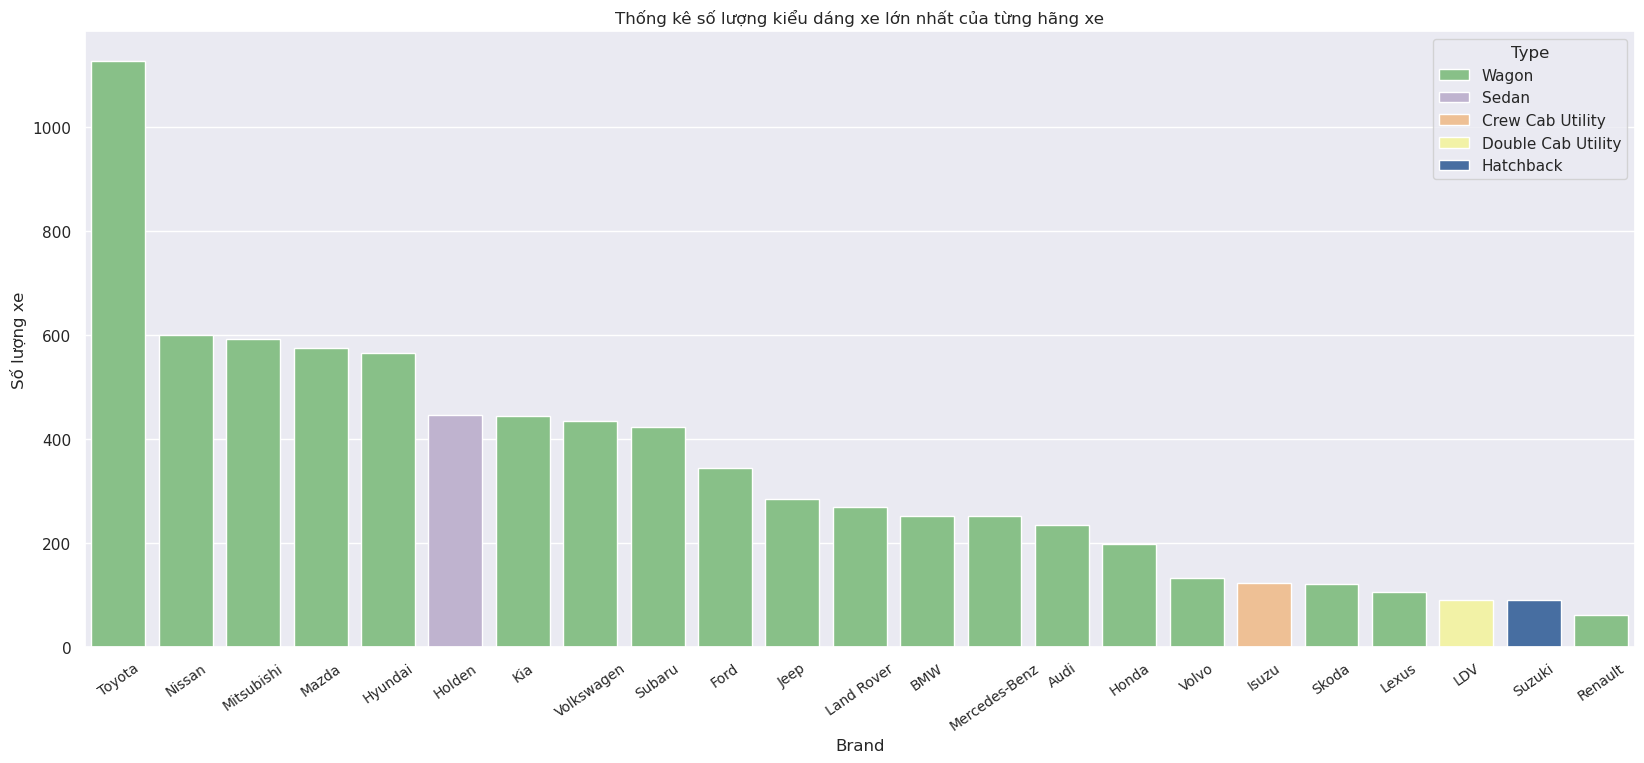

In [8]:
fig, axes = plt.subplots(figsize=(20,8))
s = sns.barplot(x='Brand',y='Count', hue='Type',data=counting_car_max,dodge=False,palette='Accent')
x_tick = plt.xticks(fontsize=10,rotation=35)
s.set_title('Thống kê số lượng kiểu dáng xe lớn nhất của từng hãng xe')
s.set_ylabel('Số lượng xe')

- Có vẻ kiểu dáng Wagon khá được nhiều người ưa chuộng ở mọi hãng xe.
- Sau khi tìm hiểu về kiểu dáng xe Wagon, em có kết luận:
    - Tuy kiểu dáng xe này chưa được phổ biến tại Việt Nam nhưng ở nước ngoài họ rất ưa chuộng.
    - Khả năng tiết kiệm nhiên liệu khá tốt.
    - Khoang xe rộng rãi.

# Câu 4: Tổng doanh thu của từng hãng xe qua từng năm là bao nhiêu?.

 Tuy đây là trang để người dùng đăng bán, nhưng ta xem giá tiền mà người bán đăng coi như lợi nhuận của hãng đó

In [9]:
# Tạo dataframe với tổng doanh thu của từng hãng xe.
sum_price_cars = cars_df.groupby(['Brand','Year']
                                ).agg({'Price':'sum'}
                                     ).rename(columns={'Price':'Total Price'}
                                             ).reset_index()

Vẽ biểu đồ thể hiện doanh thu qua từng năm.

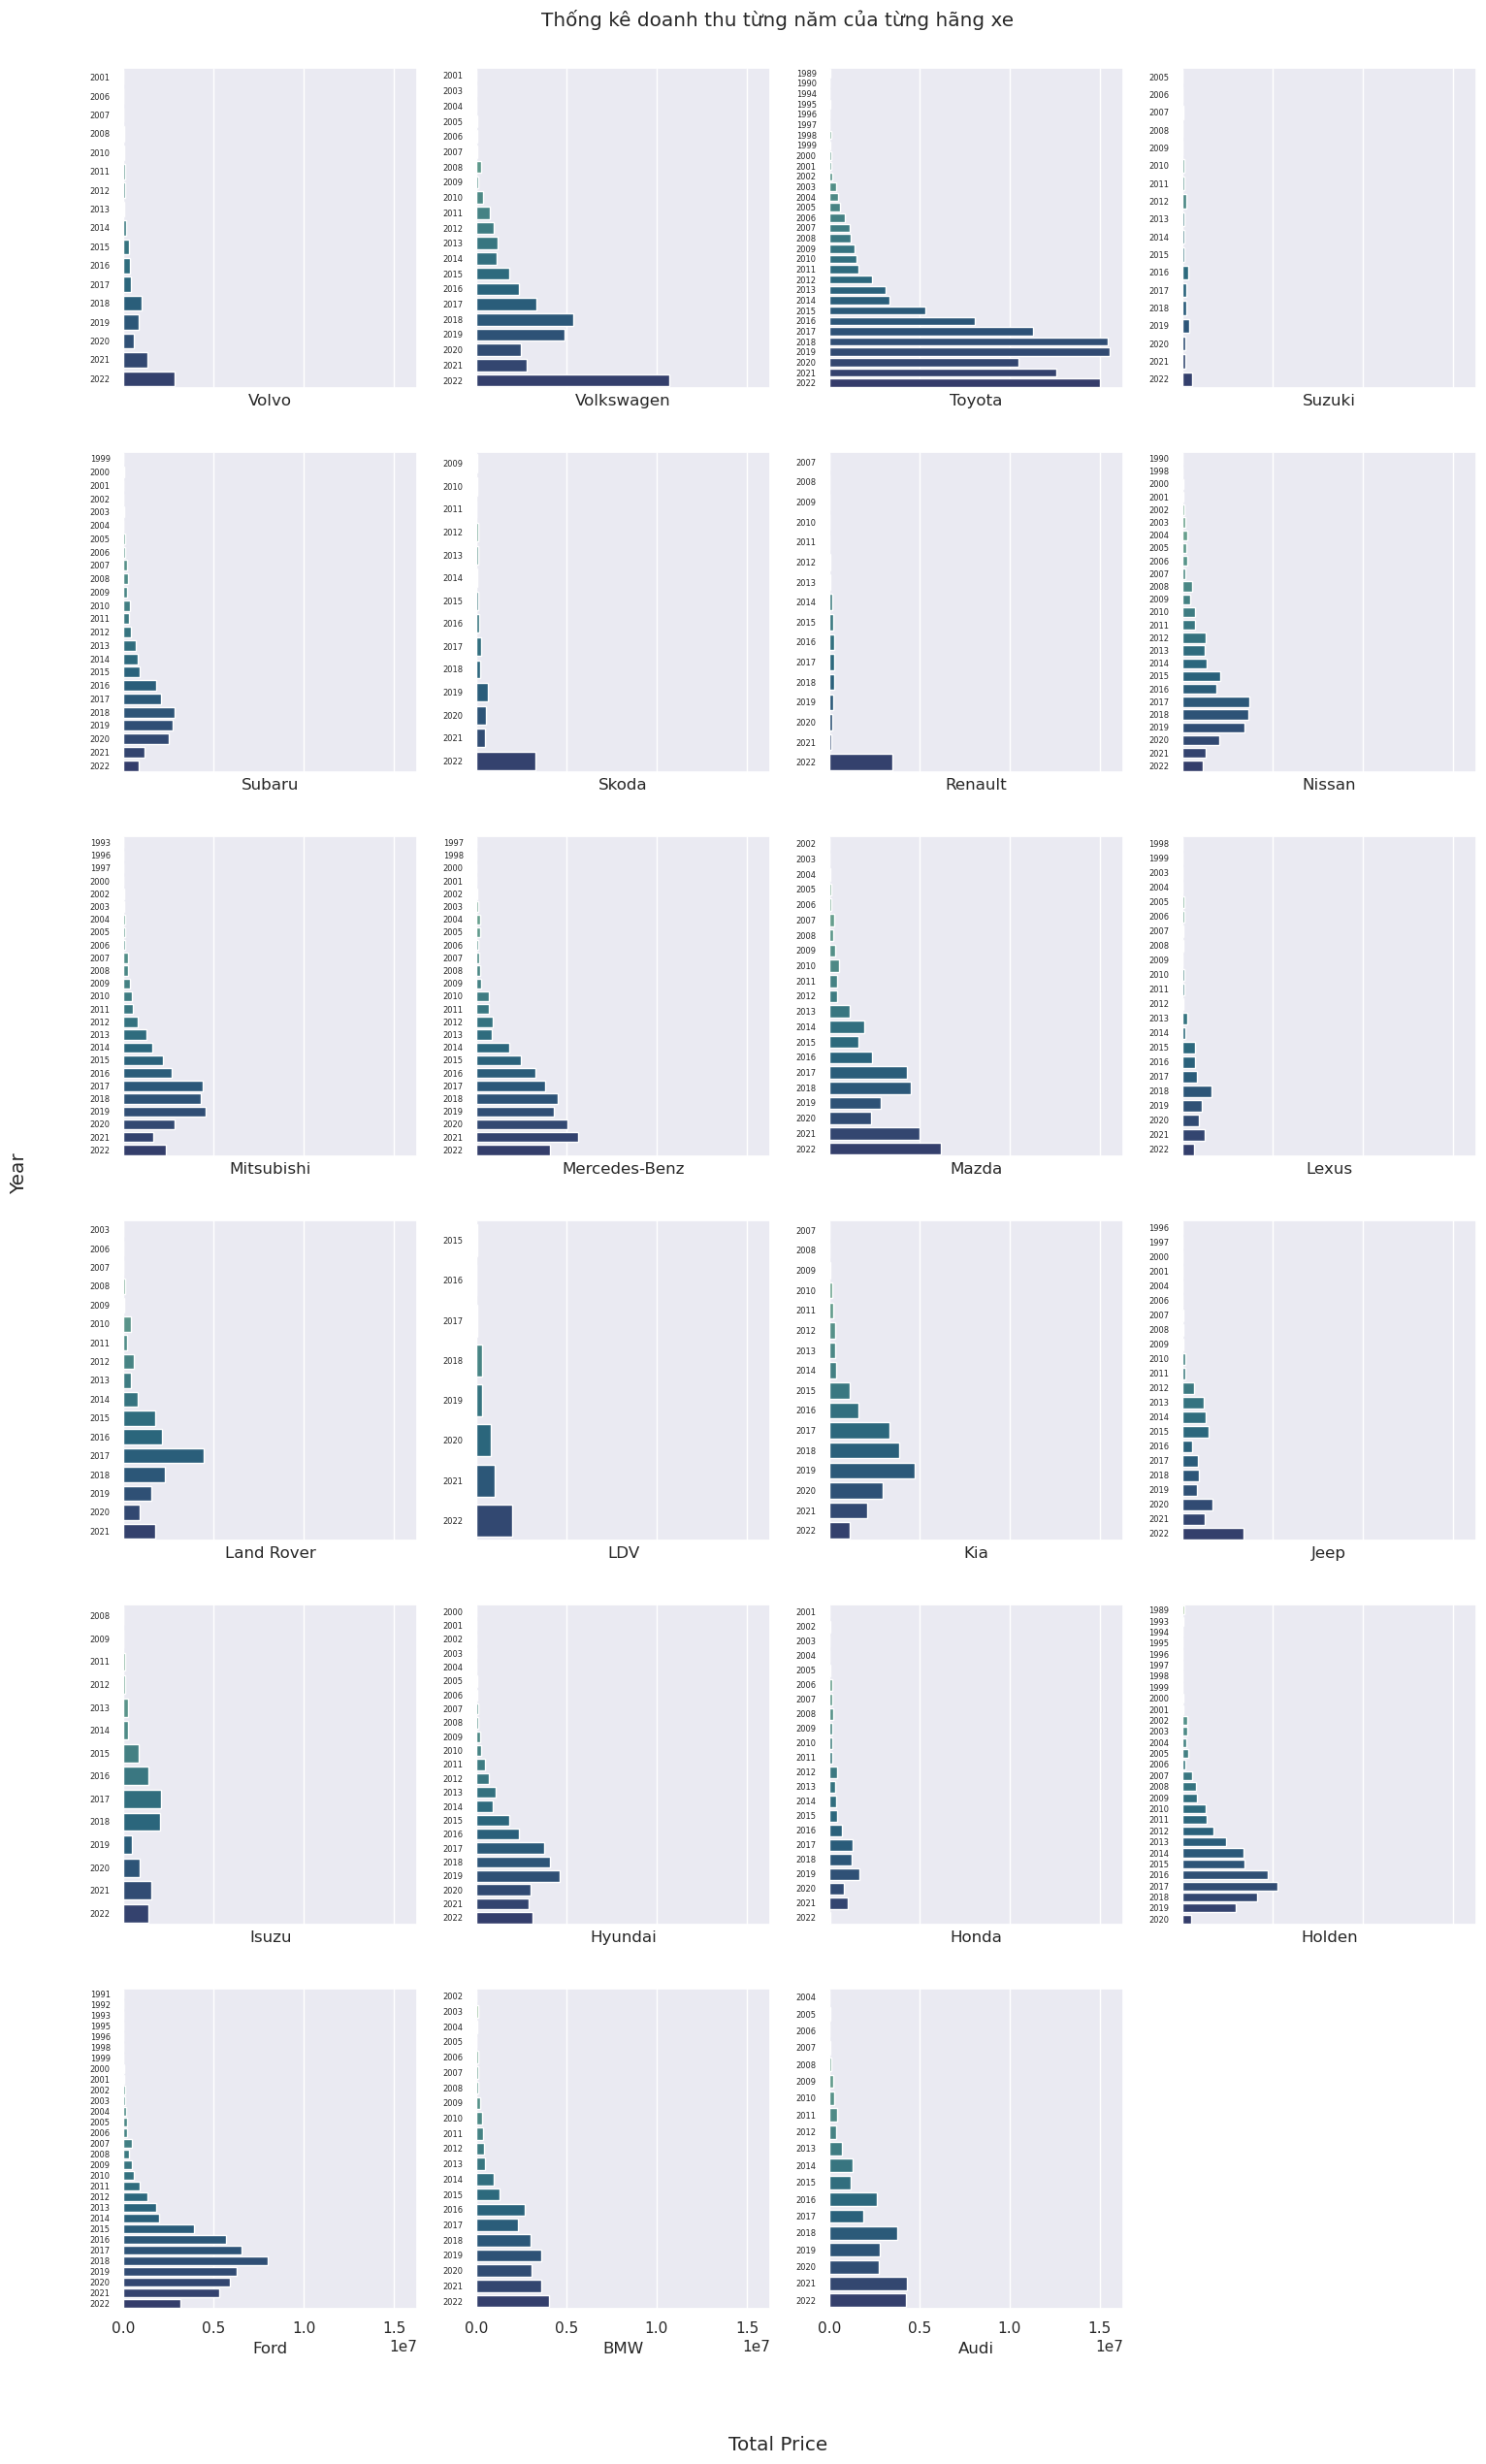

In [10]:
cars = sum_price_cars['Brand'].unique()
num_cars = len(cars)

ncols = 4
nrows = 6
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,30),sharex=True)

for i in range(nrows):
    for j in range(ncols):
        car = sum_price_cars[sum_price_cars['Brand']==cars[num_cars - 1]]
        year = car['Year'].values
        sns.barplot(x='Total Price',
                    y='Year',
                    data=car,
                    palette='crest',
                    orient='h',
                    ax=axes[i][j])
        axes[i][j].set_yticklabels(year, size=6)
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel(f'{cars[num_cars - 1]}')
        num_cars -= 1
     
fig.suptitle('Thống kê doanh thu từng năm của từng hãng xe',y=0.9)
fig.supylabel('Year', x=0.06)
fig.supxlabel('Total Price',y=0.06)
fig.delaxes(axes[5][3])

- Các hãng xe như Skoda, Renault, Volvo có doanh thu tăng đáng kể vào năm 2022.
- Có khá nhiều hãng xe có doanh thu cao vào năm (2016-2017) nhưng đến nay nó lại có xu hướng giảm
- 3 dòng xe Lexus, Suzuki và Honda có khá ít người bán lại có lẽ ít người dùng hoặc xe vẫn còn tốt nên người dùng không muốn bán.

# Câu 5: Giá xe trung bình của các xe trong các khoảng phân phối của xe ?

Nếu trả lời được câu hỏi này sẽ có lợi ích là sẽ biết được phân khúc giá xe trong từng khoảng phân phối xe.

In [11]:
print("Phân khối xe nhỏ nhất trong dataframe:",df['CC'].min())
print("Phân khối xe lớn nhất trong dataframe:",df['CC'].max())

Phân khối xe nhỏ nhất trong dataframe: 875
Phân khối xe lớn nhất trong dataframe: 7300


Tiếp theo chúng ta sẽ chia phân khối xe thành 10 khoảng từ min của cột CC đến max của cột CC và group by theo theo các thuộc các khoảng đó và tính giá trị trung bình của giá.

In [12]:
cut=pd.cut(df['CC'], np.linspace(df['CC'].min(),df['CC'].max(), 11))
CC_price=df.groupby([cut]).Price.mean().reset_index(name='avg_price')

Vẽ biểu đồ để thể hiện rõ câu trả lời của câu hỏi trên.

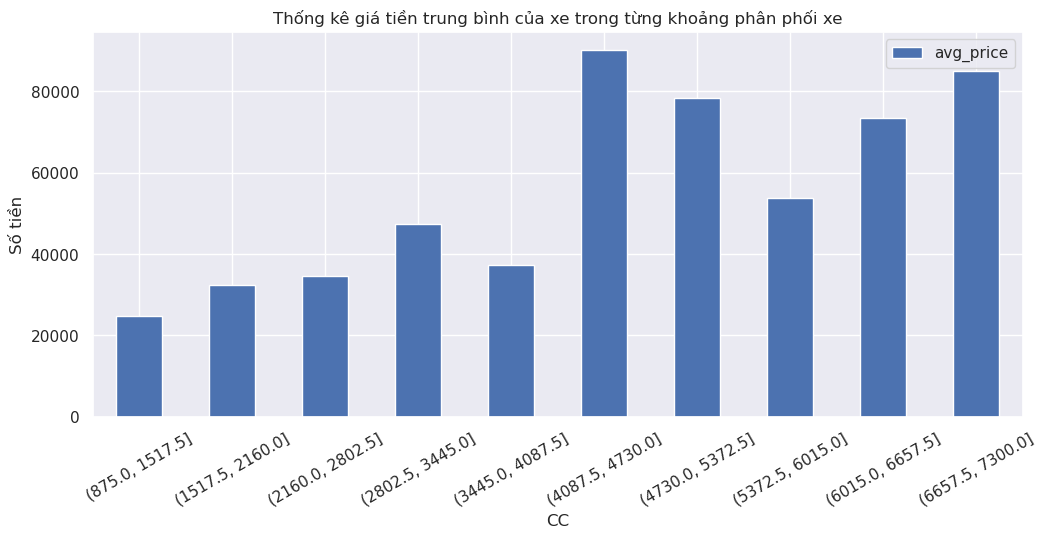

In [14]:
plt.figure(figsize = (12,5))

plt.title("Thống kê giá tiền trung bình của xe trong từng khoảng phân phối xe")
plt.ylabel("Số tiền")
ax=plt.gca()
CC_price.plot.bar(x="CC",ax=ax)
plt.xticks(rotation=30)
plt.show()

Ta có thể thấy phân phối xe cao hay thấp chưa quyết định nhiều đến giá xe nó còn phụ thuộc vào nhiều vào yếu tố khác. Yếu tố phân khối của xe chỉ góp 1 phần trong quyết định giá xe

# Câu 6: Với góc nhìn của 1 người chuyên bán xe sang, tôi muốn biết những chiếc xe sang được sản xuất trong 3 năm gần đây thuộc những brand nào và phân bố số chỗ ngồi của nó như thế nào? (với xe sang là những xe có định giá trên 100k $

Đầu tiên lọc dataframe ta chỉ lấy những chiếc xe có giá trên 100k $

In [15]:
df_luxury_car = df[df['Price'] > 100000]
len(df_luxury_car.value_counts())

508

Có thể thấy số lượng xe sang chỉ có 508 chiếc trong khi đó số lượng data thu thập là 17048 chiếc. Việc số lượng xe sang ít như vậy có thể là do đây phần lớn là những chiếc xe đã qua sử dụng và bán lại, nên chất lượng giảm sút công thêm việc hầu như những người sở hữu xe sang đều là những người có kinh tế ổn định hoặc dư dả nên không có nhu cầu bán xe.


In [16]:
# Thống kê số lượng xe sang theo brand
df_car_count = df_luxury_car.groupby('Brand')['Name'].count()
df_car_count = df_car_count.sort_values(ascending = False)
# Thống kê số lượng loại chỗ ngồi của các xe sang theo brand
df_Seating_Capacity_count = df_luxury_car['Seating Capacity'].value_counts()

Vẽ biểu đồ so sánh số lượng bán xe sang theo mỗi hãng và so sánh số lượng loại chỗ ngồi 

Text(0.5, 1.0, 'Count luxury car by seating')

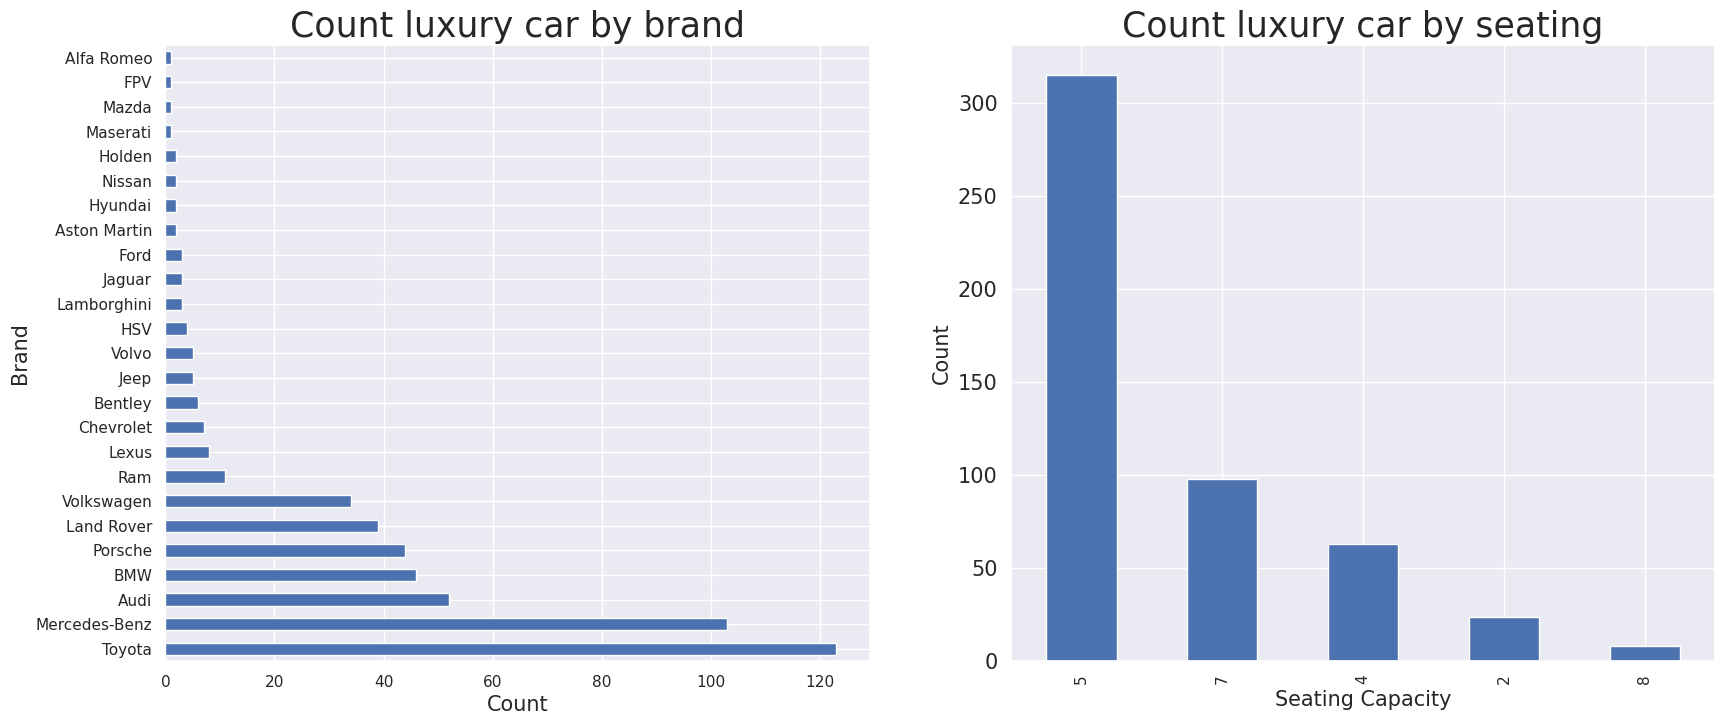

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
df_car_count.plot.barh(ax=ax1)
ax1.set_xlabel('Count',fontsize=15)
ax1.set_ylabel('Brand',fontsize=15)
plt.yticks(fontsize=15)
ax1.set_title('Count luxury car by brand',fontsize=25)

df_Seating_Capacity_count.plot.bar(ax=ax2)
plt.xlabel('Seating Capacity',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Count luxury car by seating',fontsize=25)

- Số lượng xe sang tập trung chủ yếu là Toyota và Mercedes - Benz
- Số loại chỗ ngồi nhiều nhất là 5 và 7 chỗ